![](https://www.kaggle.com/static/images/site-logo.png)

# **Note Book By : Najeeb ullah**
# **Date:2024-03-26**

# **Movie Rating Prediction**

## **Introduction**

This notebook is a simple implementation of a movie rating prediction model using the [MovieLens 100K dataset](https://www.kaggle.com/datasets/sherinclaudia/movielens/). The dataset contains 100,000 ratings applied to 9,000 movies by 600 users. The goal of this notebook is to predict the rating that a user will give to a movie based on the ratings that the user has given to other movies.This project aims to predict the movie ratings based on the user ratings. The dataset is split into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate the model's performance.
The purpose of this project is to predict the movie ratings based on the user ratings.



## **Project: Movies Prediction**

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [38]:
df_movie = pd.read_csv('./data/movies.dat', sep='::', engine='python', encoding='latin1',
                       names = ['MovieID', 'Title', 'Genres'])



In [39]:
df_ratings = pd.read_csv('./data/ratings.dat', sep='::', engine='python', encoding='latin1',
                         names =['UserID', 'MovieID', 'Rating', 'Timestamp'])



In [40]:
# create columns from user.dat
df_user = pd.read_csv('./data/users.dat', sep='::', engine='python', encoding='latin1',
                       names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])


In [41]:
# 3 dataset join
df = pd.merge(df_ratings, df_movie, on='MovieID')
df = pd.merge(df, df_user, on='UserID')
df.head()


master_df = df[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]
master_df.head()


,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


<Axes: xlabel='Rating'>

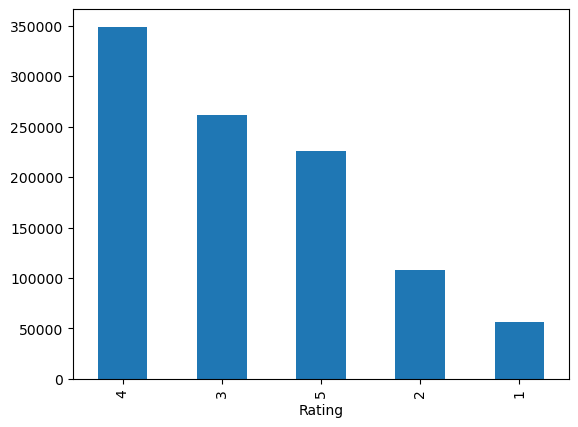

In [46]:
master_df['Rating'].value_counts().plot(kind='bar')

# **Target The Rating Age and Gender columns**

## **Rating and for all movies with Male and Female Age** 

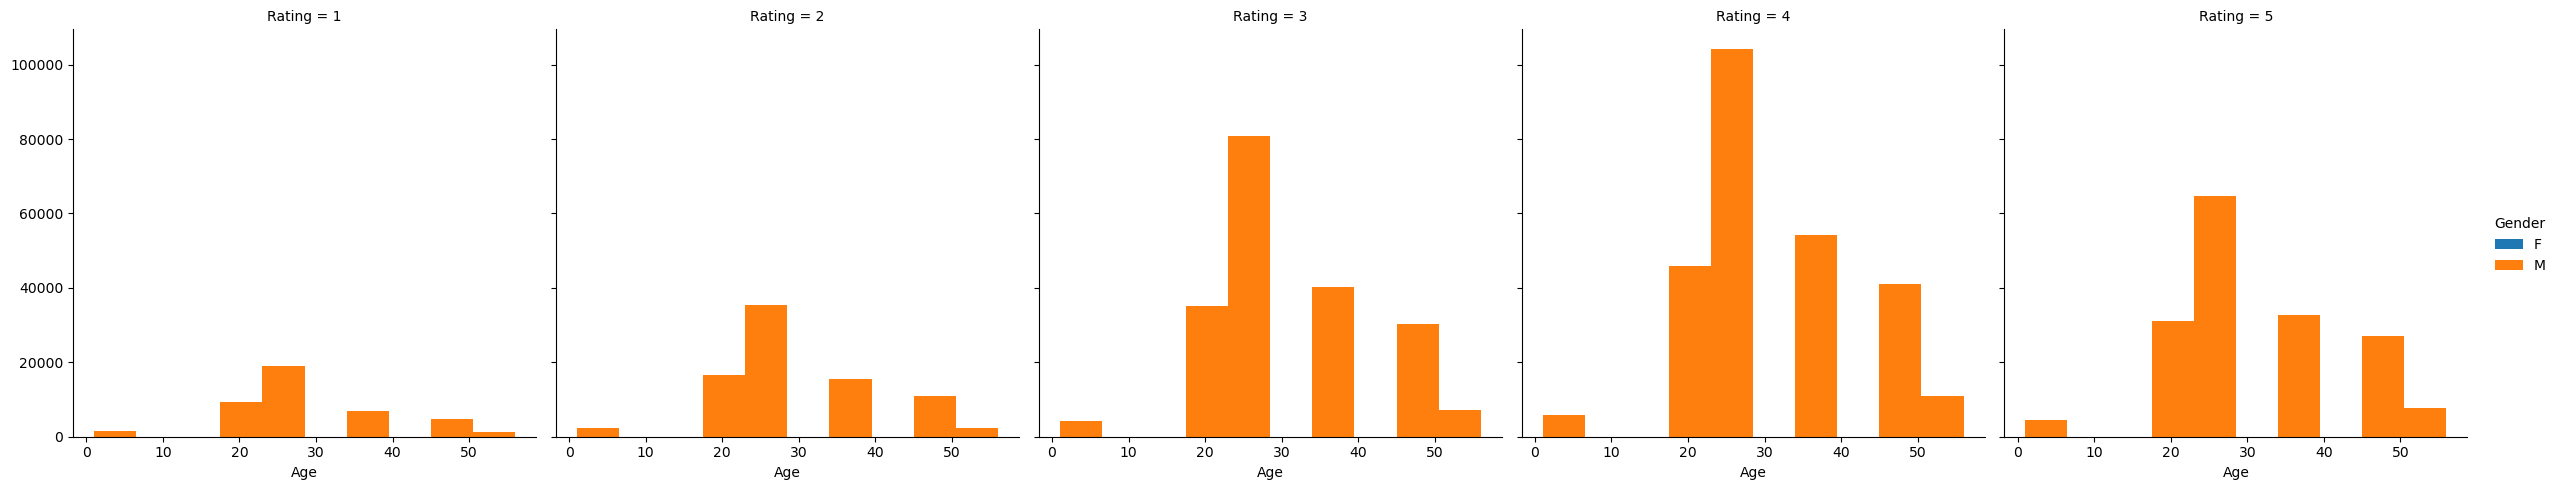

In [79]:
# create a plot rating, Age and Gender
sns.FacetGrid(master_df, hue='Gender', col='Rating', height=5).map(plt.hist, 'Age').add_legend() 


# **create a plot rating, Age and Gender** (Male)

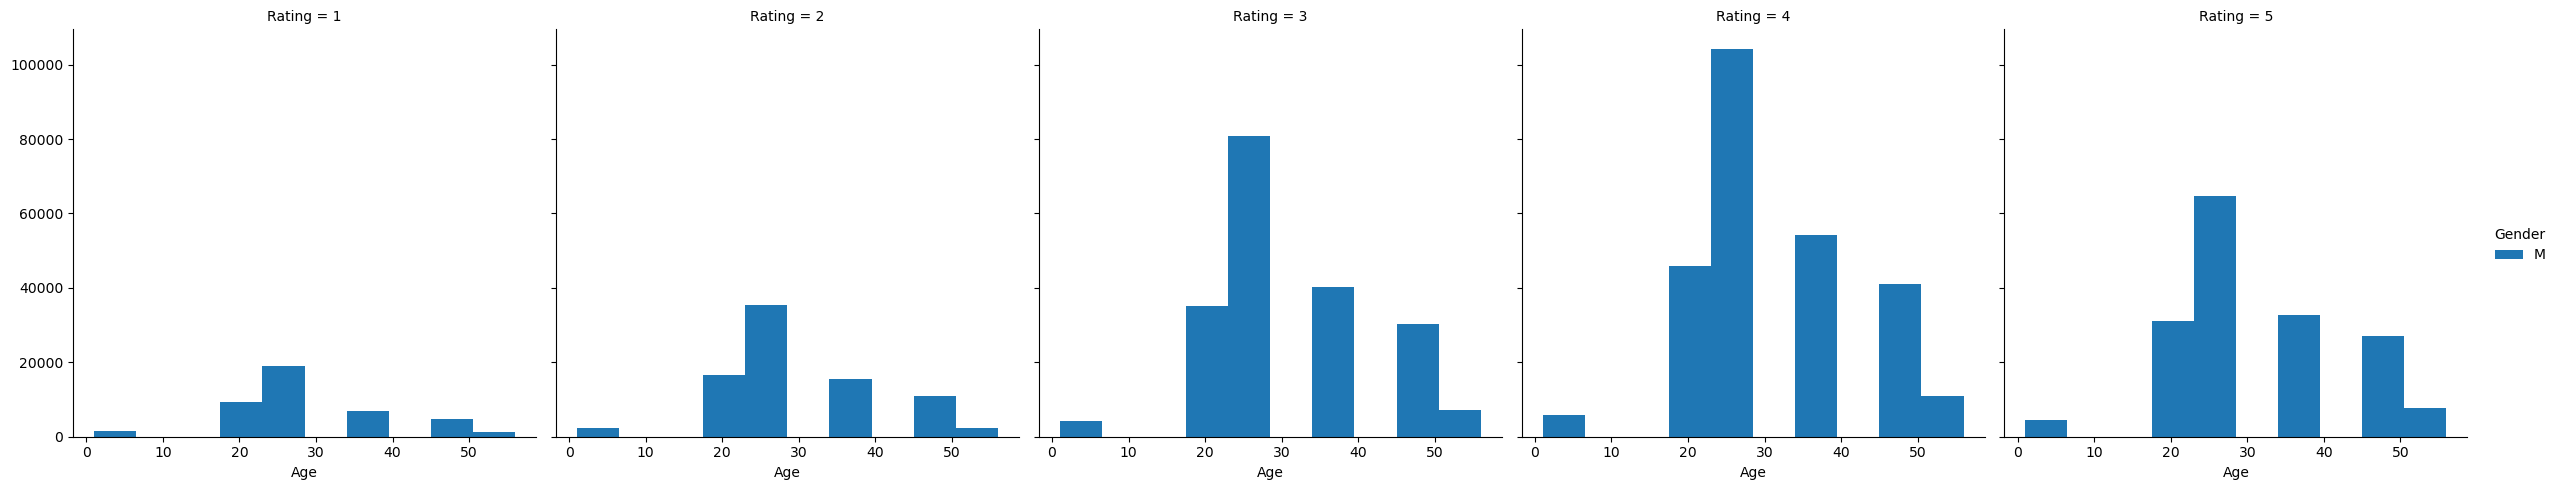

In [80]:
# create a plot rating, Age and Gender 
sns.FacetGrid(master_df[master_df['Gender'] == 'M'], hue='Gender', col='Rating', height=5).map(plt.hist, 'Age').add_legend()
plt.show()


# **create a plot rating, Age and Gender(Female)**


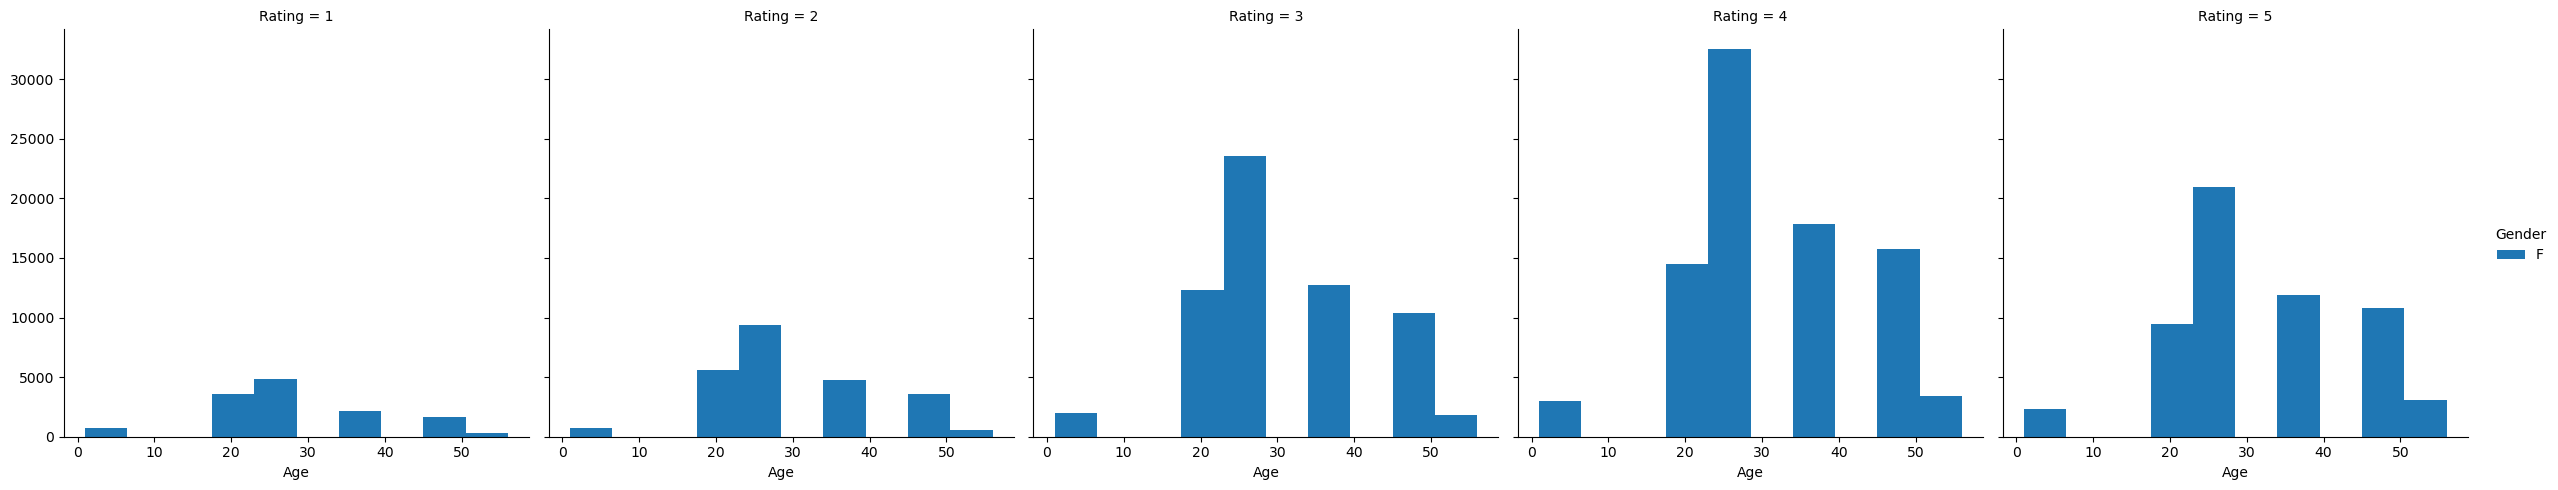

In [81]:
# create a plot rating, Age and Gender which is == F
sns.FacetGrid(master_df[master_df['Gender'] == 'F'], hue='Gender', col='Rating', height=5).map(plt.hist, 'Age').add_legend()
plt.show()


### **Rating (4) count and mean for all movies with Male and Female Age less then 25**

In [48]:
master_df[master_df['Rating'] == 4]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
3,3408,Erin Brockovich (2000),1,1,F,10,4
8,594,Snow White and the Seven Dwarfs (1937),1,1,F,10,4
9,919,"Wizard of Oz, The (1939)",1,1,F,10,4
11,938,Gigi (1958),1,1,F,10,4
12,2398,Miracle on 34th Street (1947),1,1,F,10,4
...,...,...,...,...,...,...,...
1000196,549,Thirty-Two Short Films About Glenn Gould (1993),6040,25,M,6,4
1000201,1080,Monty Python's Life of Brian (1979),6040,25,M,6,4
1000202,1089,Reservoir Dogs (1992),6040,25,M,6,4
1000207,1096,Sophie's Choice (1982),6040,25,M,6,4


In [60]:
master_df[(master_df['Rating'] == 4) & (master_df['Age'] < 25)][['Title', 'Gender']].groupby('Gender').count().sort_values(by='Title', ascending=False)

,Title
Gender,
M,51561
F,17488


In [61]:
master_df[(master_df['Rating'] == 4) & (master_df['Age'] <  25)]['Title'].value_counts().sum()

69049

In [62]:
master_df[(master_df['Rating'] == 4) & (master_df['Age'] <  25)]['Title'].value_counts().mean()

23.793590627153687

### **Rating (5) count and mean for all movies with Male and Female Age less then 25**

In [49]:
# all 4 rating movies list count 

master_df[master_df['Rating'] == 5]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
4,2355,"Bug's Life, A (1998)",1,1,F,10,5
6,1287,Ben-Hur (1959),1,1,F,10,5
7,2804,"Christmas Story, A (1983)",1,1,F,10,5
10,595,Beauty and the Beast (1991),1,1,F,10,5
...,...,...,...,...,...,...,...
1000194,1077,Sleeper (1973),6040,25,M,6,5
1000199,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5
1000200,2028,Saving Private Ryan (1998),6040,25,M,6,5
1000205,1094,"Crying Game, The (1992)",6040,25,M,6,5


In [56]:
# all 5 rating movies list and Age Lass Then 25 count with Gender
master_df[(master_df['Rating'] == 5) & (master_df['Age'] < 25)][['Title', 'Gender']].groupby('Gender').count().sort_values(by='Title', ascending=False)

,Title
Gender,
M,35601
F,11759


In [59]:
master_df[(master_df['Rating'] == 5) & (master_df['Age'] <  25)]['Title'].value_counts().sum()

47360

In [63]:
master_df[(master_df['Rating'] == 5) & (master_df['Age'] <  25)]['Title'].value_counts().mean()

19.04302372336148

# Target The Title column 


In [89]:
master_df['Title'].unique()

array(["One Flew Over the Cuckoo's Nest (1975)",
       'James and the Giant Peach (1996)', 'My Fair Lady (1964)', ...,
       'White Boys (1999)', 'One Little Indian (1973)',
       'Five Wives, Three Secretaries and Me (1998)'], dtype=object)

In [90]:
master_df['Title'].nunique()

3706

In [91]:
#find out the most popular movie
print(master_df['Title'].value_counts().idxmax())

American Beauty (1999)


In [92]:
print(master_df['Title'].value_counts().idxmin())

Detroit 9000 (1973)


### MOST RATED MOVIE American Beauty (1999) check the American Beauty Rating with Gender Male and Female


In [95]:
# check the American Beauty Rating with Gender 
master_df[(master_df['Title'] == 'American Beauty (1999)') & (master_df['Gender'] == 'M')][['Title', 'Rating']].groupby('Rating').count().sort_values(by='Rating', ascending=False)

,Title
Rating,
5,1434
4,664
3,246
2,88
1,50


In [96]:
master_df[(master_df['Title'] == 'American Beauty (1999)') & (master_df['Gender'] == 'F')][['Title', 'Rating']].groupby('Rating').count().sort_values(by='Rating', ascending=False)

,Title
Rating,
5,529
4,226
3,112
2,46
1,33
